In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [ ]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


Please generate an api key with kaggle and download te kaggle.json. Upload it to run the notebook

In [ ]:
!cp /content/kaggle.json ~/.kaggle/kaggle.json

In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d medharawat/google-stock-price

google-stock-price.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
from zipfile import ZipFile
  
file_name = "/content/google-stock-price.zip"

with ZipFile(file_name, 'r') as zip:
    # printing all the contents of the zip file
    zip.printdir()
    print('Extracting all the files now...')
    zip.extractall()
    print('Done!')

File Name                                             Modified             Size
Google_Stock_Price_Test.csv                    2019-09-29 07:21:16         1029
Google_Stock_Price_Train.csv                   2019-09-29 07:21:16        63488
Extracting all the files now...
Done!


In [ ]:
data = pd.read_csv("/content/Google_Stock_Price_Train.csv")
data.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [ ]:
test_data = pd.read_csv("/content/Google_Stock_Price_Test.csv")
test_data.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2017,778.81,789.63,775.80,786.14,"1,657,300"
1,1/4/2017,788.36,791.34,783.16,786.90,"1,073,000"
2,1/5/2017,786.08,794.48,785.02,794.02,"1,335,200"
3,1/6/2017,795.26,807.90,792.20,806.15,"1,640,200"
4,1/9/2017,806.40,809.97,802.83,806.65,"1,272,400"


In [ ]:
data_set = data.loc[:, ["Open"]].values
train = data_set[:len(data_set)]
#test = data_set[len(train):]

train.reshape(train.shape[0],1)

array([[325.25],
       [331.27],
       [329.83],
       ...,
       [793.7 ],
       [783.33],
       [782.75]])

In [ ]:
test_data = test_data.loc[:, ['Open']].values

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))
train_scaler = scaler.fit_transform(train)

In [ ]:
X_train = []
Y_train = []
timesteps = 50

for i in range(timesteps, len(train_scaler)):
    X_train.append(train_scaler[i - timesteps:i, 0])
    Y_train.append(train_scaler[i,0])
    
X_train, Y_train = np.array(X_train), np.array(Y_train)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [ ]:
X_train.shape

(1208, 50, 1)

### RNN

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN, Dropout

regressor = Sequential()

regressor.add(SimpleRNN(units = 50, activation = "tanh", return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))
regressor.add(SimpleRNN(units = 50, activation = "tanh", return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(SimpleRNN(units = 50, activation = "tanh", return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(SimpleRNN(units = 50))
regressor.add(Dropout(0.2))
regressor.add(Dense(units = 1))
regressor.compile(optimizer = "adam", loss = "mean_squared_error")
regressor.fit(X_train, Y_train, epochs = 100, batch_size = 32)

Epoch 1/100
38/38 [==============================] - 57s 44ms/step - loss: 0.5400
Epoch 2/100
38/38 [==============================] - 2s 45ms/step - loss: 0.3418
Epoch 3/100
38/38 [==============================] - 2s 45ms/step - loss: 0.2717
Epoch 4/100
38/38 [==============================] - 2s 45ms/step - loss: 0.1975
Epoch 5/100
38/38 [==============================] - 2s 44ms/step - loss: 0.1587
Epoch 6/100
38/38 [==============================] - 2s 45ms/step - loss: 0.1233
Epoch 7/100
38/38 [==============================] - 2s 44ms/step - loss: 0.0961
Epoch 8/100
38/38 [==============================] - 2s 44ms/step - loss: 0.0726
Epoch 9/100
38/38 [==============================] - 2s 44ms/step - loss: 0.0697
Epoch 10/100
38/38 [==============================] - 2s 44ms/step - loss: 0.0659
Epoch 11/100
38/38 [==============================] - 3s 91ms/step - loss: 0.0570
Epoch 12/100
38/38 [==============================] - 4s 102ms/step - loss: 0.0464
Epoch 13/100
38/38 [===

In [ ]:
test_input = data_set[-50:]
test_set = np.concatenate((test_input, test_data), axis = 0)
test_set.shape

(70, 1)

In [ ]:
inputs = test_set
inputs = scaler.transform(inputs)

In [ ]:
inputs.shape

(70, 1)

In [ ]:
X_test = []
Y_test = []
for i in range(timesteps, inputs.shape[0]):
    X_test.append(inputs[i - timesteps:i, 0])
    Y_test.append(inputs[i,0])
    
X_test_rnn = np.array(X_test)
X_test_rnn = np.reshape(X_test_rnn, (X_test_rnn.shape[0], X_test_rnn.shape[1], 1))
predicted_stock_price = regressor.predict(X_test_rnn)
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)

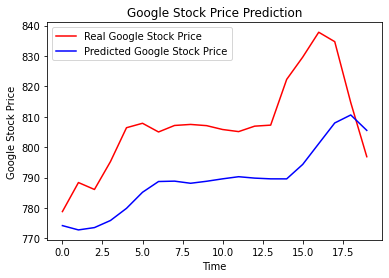

In [ ]:
plt.plot(test_data, color = "red", label = "Real Google Stock Price")
plt.plot(predicted_stock_price, color = "blue", label = "Predicted Google Stock Price")
plt.title("Google Stock Price Prediction")
plt.xlabel("Time")
plt.ylabel("Google Stock Price")
plt.legend()
plt.show()

### LSTM

In [ ]:
trainX = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))

In [ ]:
import math
from keras.models import Sequential
from keras.layers import Dense, LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [ ]:
model = Sequential()
model.add(LSTM(timesteps, return_sequences=True, input_shape = (1, timesteps)))
model.add(LSTM(timesteps, return_sequences=True))
model.add(LSTM(timesteps, return_sequences=True))
model.add(LSTM(timesteps))
model.add(Dense(1))
model.compile(loss = "mean_squared_error", optimizer = "adam")
model.fit(trainX, Y_train, epochs = 50, batch_size = 1)

Epoch 1/50
1208/1208 [==============================] - 16s 8ms/step - loss: 0.0077
Epoch 2/50
1208/1208 [==============================] - 5s 4ms/step - loss: 0.0023
Epoch 3/50
1208/1208 [==============================] - 5s 4ms/step - loss: 0.0016
Epoch 4/50
   1/1208 [..............................] - ETA: 9s - loss: 1.9781e-05

In [ ]:
testX = np.array(X_test)
testX = testX.reshape(testX.shape[0], 1, testX.shape[1])
predict_lstm = model.predict(testX)
predict_lstm = scaler.inverse_transform(predict_lstm)

In [ ]:
plt.plot(test_data, color = "red", label = "Real Google Stock Price")
plt.plot(predict_lstm, color = "blue", label = "Predicted Google Stock Price")
plt.title("Google Stock Price Prediction")
plt.xlabel("Time")
plt.ylabel("Google Stock Price")
plt.legend()
plt.show()